## 5.5 卷积神经网络（LeNet）

### 针对（3.9）多层感知机存在以下问题

* 图像在同一列邻近的像素在这个向量中可能相距较远。它们构成的模式可能难以被模型识别。
* 对于大尺寸的输入图像，使用全连接层容易导致模型过大。假设输入是高和宽均为1,000像素的彩色照片（含3个通道）。
  即使全连接层输出个数仍是256，该层权重参数的形状也是3,000,000×256：它占用了大约3 GB的内存或显存。
  这会带来过于复杂的模型和过高的存储开销。

### 卷积层尝试解决这两个问题

* 一方面，卷积层保留输入形状，使图像的像素在高和宽两个方向上的相关性均可能被有效识别
* 另一方面，卷积层通过滑动窗口将同一卷积核与不同位置的输入重复计算，从而避免参数尺寸过大


In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from livelossplot.keras import PlotLossesCallback

In [2]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(6, (5, 5), activation='sigmoid'),
    keras.layers.MaxPool2D((2, 2), strides=2),
    keras.layers.Conv2D(16, (5, 5), activation='sigmoid'),
    keras.layers.MaxPool2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(10),
    keras.layers.Softmax(),
])
model.build()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### 5.5.2 获取数据和训练模型

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
def metric_accuracy(y_true, y_pred):
    ytrue = K.flatten(y_true)
    ypred = K.cast(K.argmax(y_pred, axis=-1), K.floatx())
    acc = K.equal(ytrue, ypred)
    return K.mean(acc)

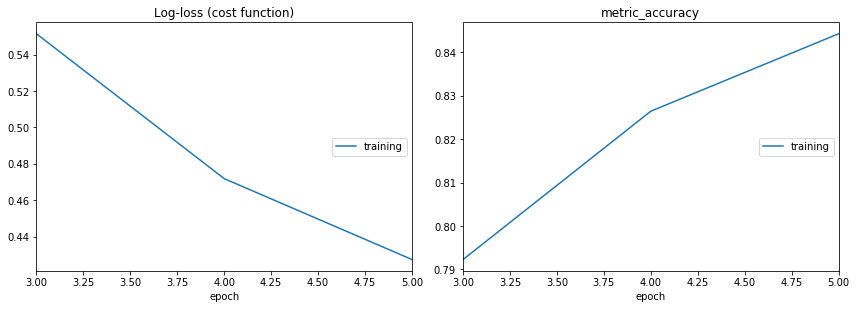

Log-loss (cost function):
training   (min:    0.427, max:    1.457, cur:    0.427)

metric_accuracy:
training   (min:    0.510, max:    0.844, cur:    0.844)
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4274 - metric_accuracy: 0.8443


In [6]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=[metric_accuracy])
model.fit(x_train.reshape((60000, 28, 28, 1)), y_train, epochs=5, batch_size=256, 
          callbacks=[PlotLossesCallback()])